In [1]:
## features - u_band, g_band, r_band, i_band, z_band, redshift
## targets - BH Mass

In [98]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [8]:
#reading data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/clean_full_data_absma2g.csv')
df = df.drop(columns = ['RA', 'DEC', 'ID', 'ERR', 'M_i', 'M_g','M_r','M_z', 'M_u', 'Unnamed: 0','mu'])
df.describe()

,Mass_ground_truth,u_band,g_band,r_band,i_band,z_band,z
count,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000
mean,8.867894,20.396686,19.947587,19.708557,19.551542,19.448860,1.572702
std,0.486235,1.095941,0.799961,0.744494,0.728075,0.734351,0.718324
min,6.996912,15.386409,15.469591,15.478295,15.084432,15.230790,0.080200
25%,8.554472,19.789452,19.493492,19.288808,19.147046,19.047717,1.055450
50%,8.886594,20.354750,20.039639,19.830204,19.673612,19.558660,1.517400
75%,9.202909,20.863320,20.475868,20.218864,20.051694,19.949335,1.973600
max,10.780877,24.975222,24.942605,22.111290,22.054080,22.068864,4.886400


In [36]:
# defining feature and target numpy arrays
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [37]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
# normalizing features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)

(2286, 6)
(2286,)


In [85]:
# KNN Regression Classifier
# K value of 6 chosen from Pasquet 2018, Euclidean distance metric, uniform weights
classifier = KNeighborsRegressor(n_neighbors = 6, weights = 'uniform', p=2)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [112]:
# Fitting
y_pred = classifier.predict(X_test)

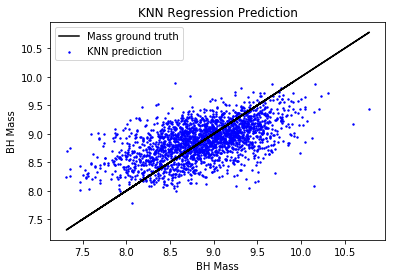

In [113]:
plt.plot(y_test, y_test, color = 'black', label = 'Mass ground truth')
plt.scatter(y_test, y_pred, color = 'blue', s=2, label = 'KNN prediction')
plt.xlabel('BH Mass')
plt.ylabel('BH Mass')
plt.legend()
plt.title('KNN Regression Prediction')
plt.show()

In [114]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.414356526799
r2 score: 0.278921400285


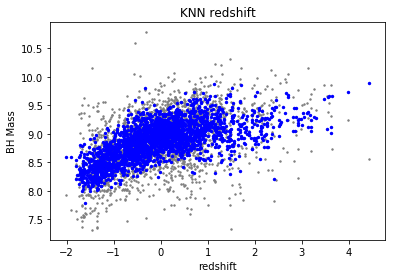

In [115]:
plt.scatter(X_test[:,-1], y_test,  color='gray',s=2)
plt.scatter(X_test[:,-1], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('redshift')
plt.ylabel('BH Mass')
plt.title('KNN redshift')
plt.show()

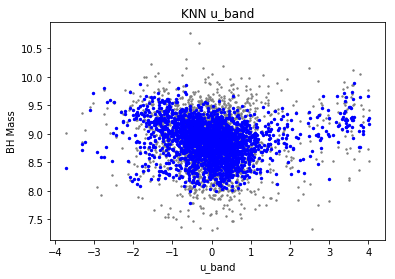

In [105]:
plt.scatter(X_test[:,0], y_test,  color='gray',s=2)
plt.scatter(X_test[:,0], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('u_band')
plt.ylabel('BH Mass')
plt.title('KNN u_band')
plt.show()

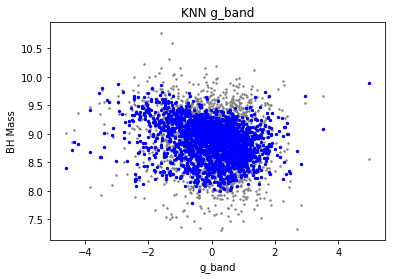

In [106]:
plt.scatter(X_test[:,1], y_test,  color='gray',s=2)
plt.scatter(X_test[:,1], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('g_band')
plt.ylabel('BH Mass')
plt.title('KNN g_band')
plt.show()

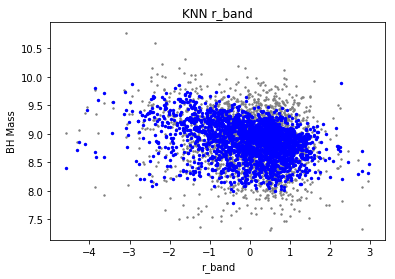

In [107]:
plt.scatter(X_test[:,2], y_test,  color='gray',s=2)
plt.scatter(X_test[:,2], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('r_band')
plt.ylabel('BH Mass')
plt.title('KNN r_band')
plt.show()

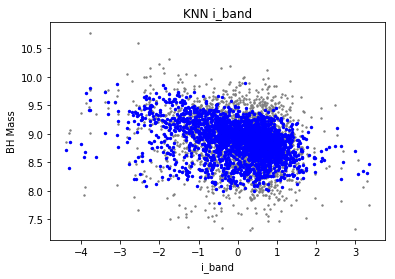

In [108]:
plt.scatter(X_test[:,3], y_test,  color='gray',s=2)
plt.scatter(X_test[:,3], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('i_band')
plt.ylabel('BH Mass')
plt.title('KNN i_band')
plt.show()

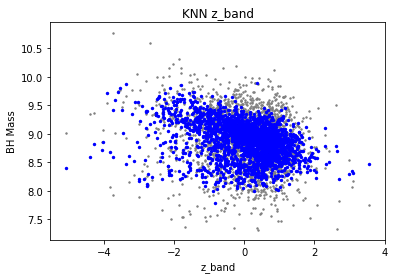

In [109]:
plt.scatter(X_test[:,4], y_test,  color='gray',s=2)
plt.scatter(X_test[:,4], y_pred, color='blue', linewidth=2,s=2)
plt.xlabel('z_band')
plt.ylabel('BH Mass')
plt.title('KNN z_band')
plt.show()